# Campaign for selling personal loans.

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

Use a new python notebook and read the column description and ensure you understand each attribute well
Study the data distribution in each attribute, share your findings. (5 points)
Get the target column distribution. Your comments
Split the data into training and test set in the ratio of 70:30 respectively
Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)
Print the confusion matrix for all the above models (5 points)
 7. Give your reasoning on which is the best model in this case and why it performs better? (5 points)

Dataset:Bank_Personal_Loan_Modelling-1.csv

Column description: TheraBank_Column_Description.xlsx

Please note: Since going forward, you will be pushing all your assessment files to the same repository for the remainder of the program, so it is important that you follow some name structure to identify your assessment submission properly.

In [1]:
#get all packages required
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.simplefilter('ignore')

In [2]:
#Question 1:
#Use a new python notebook and read the column description 
#Ensure you understand each attribute well Study the data distribution in each attribute
#share your findings. (5 points)

In [3]:
#Column details
#ID                     Customer ID
#Age                    Customer's age in completed years
#Experience             #years of professional experience
#Income                 Annual income of the customer ($000)
#ZIPCode                Home Address ZIP code.
#Family                 Family size of the customer
#CCAvg                  Avg. spending on credit cards per month ($000)
#Education              Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
#Mortgage               Value of house mortgage if any. ($000)
#Personal Loan          Did this customer accept the personal loan offered in the last campaign?
#Securities Account     Does the customer have a securities account with the bank?
#CD Account             Does the customer have a certificate of deposit (CD) account with the bank?
#Online                 Does the customer use internet banking facilities?
#CreditCard             Does the customer use a credit card issued by UniversalBank?


In [4]:
#Read the CSV file and prepare the DF
bankDF = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv") 
print(bankDF.info())
#Find the missing value. 
#Get missing values isna gives true or false for every cell; total the true's which is 1 to get the null totals
print("NA values\n", bankDF.isna().sum())
print("Null values\n", bankDF.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None
NA values
 ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan     

In [5]:
#drop the ID column which has no significance
bankDF.drop("ID", axis=1, inplace=True)
bankDF.sample(10)

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
550    60          34      54     94301       3   0.30          2         0   
4899   54          29      85     94928       4   1.30          3       299   
1486   35           9     141     93022       2   4.50          2         0   
1981   52          26      84     91768       3   3.00          2         0   
1128   30           5     171     94025       2   1.90          2         0   
552    28           3      52     90024       4   2.20          1       230   
2679   57          32      43     92704       2   2.10          3       166   
2611   33           8      78     95051       3   0.60          2         0   
3359   43          19      45     91773       3   0.60          2         0   
3011   55          31      63     95616       3   2.67          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
550               0                   0           0       1           1  
4899              0                   0           0       1           0  
1486              1                   0           0       0           0  
1981              0                   0           0       1           0  
1128              1                   0           0       0           0  
552               0                   0           0       1           0  
2679              0                   0           0       1           0  
2611              0                   0           0       1           0  
3359              0                   0           0       0           0  
3011              0                   0           0       1           0

In [6]:
#checking the number of unique values of other attributes
print("\nNumber of unique values of other attributes")
for cls in bankDF.items():
    print(cls[0], cls[1].nunique())
    if(cls[1].nunique() < 50):
        print(cls[1].unique())


Number of unique values of other attributes
Age 45
[25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]
Experience 47
[ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]
Income 162
ZIP Code 467
Family 4
[4 3 1 2]
CCAvg 108
Education 3
[1 2 3]
Mortgage 347
Personal Loan 2
[0 1]
Securities Account 2
[1 0]
CD Account 2
[0 1]
Online 2
[0 1]
CreditCard 2
[0 1]


In [7]:
bankDF[["Income","Mortgage","CCAvg"]].describe()

Income     Mortgage        CCAvg
count  5000.000000  5000.000000  5000.000000
mean     73.774200    56.498800     1.937938
std      46.033729   101.713802     1.747659
min       8.000000     0.000000     0.000000
25%      39.000000     0.000000     0.700000
50%      64.000000     0.000000     1.500000
75%      98.000000   101.000000     2.500000
max     224.000000   635.000000    10.000000

In [8]:
print("Experience has negative values for 52 rows. Income is varying. Most have a familiy. No good logic to set is seen to create experience column from Age. So setting it to 0")
bankDF["Experience"] = np.where(bankDF["Experience"] < 0, 0, bankDF["Experience"])
#checking if the update is OK
bankDF["Experience"].unique()
print("Zipcode has too many values. To be checked for significance")

Experience has negative values for 52 rows. Income is varying. Most have a familiy. No good logic to set is seen to create experience column from Age. So setting it to 0
Zipcode has too many values. To be checked for significance


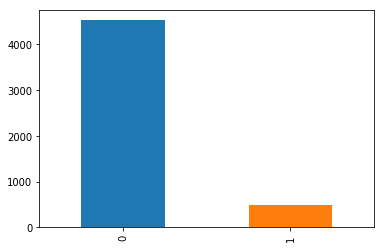

0    4520
1     480
Name: Personal Loan, dtype: int64
% clients with personal loan 9.6


In [9]:
#Question 2:
#Get the target column distribution.
#Your comments
pd.value_counts(bankDF["Personal Loan"]).plot(kind="bar")
plt.show()
loanData = pd.value_counts(bankDF["Personal Loan"])
print(pd.value_counts(bankDF["Personal Loan"]))
print("% clients with personal loan", 100.0*loanData[1]/sum(loanData))

In [10]:
bankDF.corr()

Age  Experience    Income  ZIP Code    Family  \
Age                 1.000000    0.994198 -0.055269 -0.029216 -0.046418   
Experience          0.994198    1.000000 -0.046729 -0.028783 -0.052213   
Income             -0.055269   -0.046729  1.000000 -0.016410 -0.157501   
ZIP Code           -0.029216   -0.028783 -0.016410  1.000000  0.011778   
Family             -0.046418   -0.052213 -0.157501  0.011778  1.000000   
CCAvg              -0.052012   -0.049912  0.645984 -0.004061 -0.109275   
Education           0.041334    0.013536 -0.187524 -0.017377  0.064929   
Mortgage           -0.012539   -0.010840  0.206806  0.007383 -0.020445   
Personal Loan      -0.007726   -0.007858  0.502462  0.000107  0.061367   
Securities Account -0.000436   -0.001111 -0.002616  0.004704  0.019994   
CD Account          0.008043    0.010046  0.169738  0.019972  0.014110   
Online              0.013702    0.013975  0.014206  0.016990  0.010354   
CreditCard          0.007681    0.008910 -0.002385  0.007691  0.011588   

                       CCAvg  Education  Mortgage  Personal Loan  \
Age                -0.052012   0.041334 -0.012539      -0.007726   
Experience         -0.049912   0.013536 -0.010840      -0.007858   
Income              0.645984  -0.187524  0.206806       0.502462   
ZIP Code           -0.004061  -0.017377  0.007383       0.000107   
Family             -0.109275   0.064929 -0.020445       0.061367   
CCAvg               1.000000  -0.136124  0.109905       0.366889   
Education          -0.136124   1.000000 -0.033327       0.136722   
Mortgage            0.109905  -0.033327  1.000000       0.142095   
Personal Loan       0.366889   0.136722  0.142095       1.000000   
Securities Account  0.015086  -0.010812 -0.005411       0.021954   
CD Account          0.136534   0.013934  0.089311       0.316355   
Online             -0.003611  -0.015004 -0.005995       0.006278   
CreditCard         -0.006689  -0.011014 -0.007231       0.002802   

                    Securities Account  CD Account    Online  CreditCard  
Age                          -0.000436    0.008043  0.013702    0.007681  
Experience                   -0.001111    0.010046  0.013975    0.008910  
Income                       -0.002616    0.169738  0.014206   -0.002385  
ZIP Code                      0.004704    0.019972  0.016990    0.007691  
Family                        0.019994    0.014110  0.010354    0.011588  
CCAvg                         0.015086    0.136534 -0.003611   -0.006689  
Education                    -0.010812    0.013934 -0.015004   -0.011014  
Mortgage                     -0.005411    0.089311 -0.005995   -0.007231  
Personal Loan                 0.021954    0.316355  0.006278    0.002802  
Securities Account            1.000000    0.317034  0.012627   -0.015028  
CD Account                    0.317034    1.000000  0.175880    0.278644  
Online                        0.012627    0.175880  1.000000    0.004210  
CreditCard                   -0.015028    0.278644  0.004210    1.000000

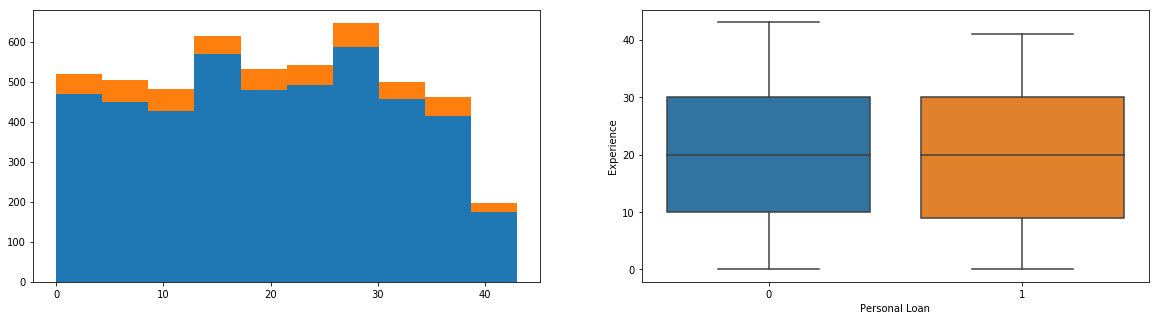

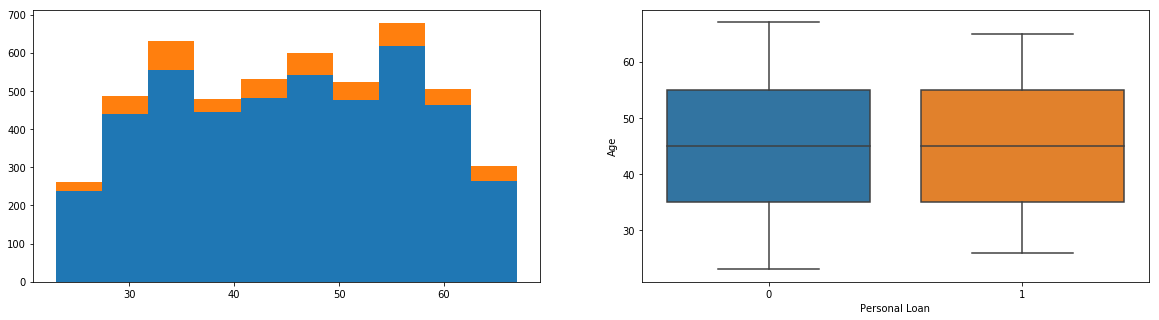

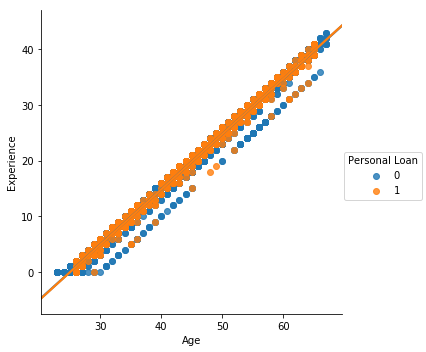

Experience and Age has very high correlation. So dropping Experience as it had some invalid values


In [11]:
#check for experience vs age which one to retain due to high correlation
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
histData = [bankDF["Experience"][bankDF["Personal Loan"]==cls_name] for cls_name in [0, 1]]
ax1.hist(histData, histtype='bar', stacked=True)
sns.boxplot(x="Personal Loan", y="Experience", data=bankDF, ax=ax2)
plt.show()

#check for experience vs age which one to retain due to high correlation
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
histData = [bankDF["Age"][bankDF["Personal Loan"]==cls_name] for cls_name in [0, 1]]
ax1.hist(histData, histtype='bar', stacked=True)
sns.boxplot(x="Personal Loan", y="Age", data=bankDF, ax=ax2)
plt.show()

sns.lmplot("Age", "Experience", bankDF, hue="Personal Loan")
plt.show()
#based on the graphs we see below, it is OK to only keep one of the parameters. 
#Since experience also had some negative values it is better to frop Experience from the feature list
print("Experience and Age has very high correlation. So dropping Experience as it had some invalid values")

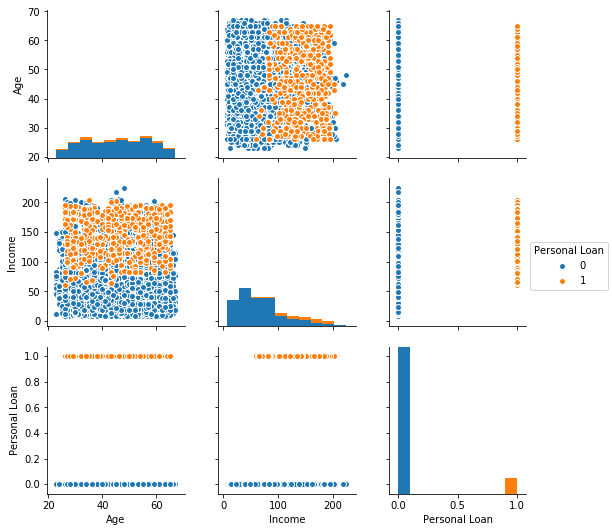

Age as a feature is not very useful as seen below. So drop Age


In [12]:
#check for any significance for Age and Income and usefulness of age as no seperability was seen
cols = ["Age", "Income", "Personal Loan"]
sns.pairplot(bankDF[cols], hue="Personal Loan")
plt.show()
print("Age as a feature is not very useful as seen below. So drop Age")

In [13]:
#check for zipcode just for analysis groupby Personal Loan
print("Zip codes where loan was offerred ", ((bankDF.groupby(['ZIP Code']).sum().sort_values("Personal Loan", ascending=False))["Personal Loan"]>0).sum())
print("Number of Zip codes", bankDF["ZIP Code"].nunique())
print("Nothing emerges from Zip code and Personal loan. So the feature can be dropped")

Zip codes where loan was offerred  238
Number of Zip codes 467
Nothing emerges from Zip code and Personal loan. So the feature can be dropped


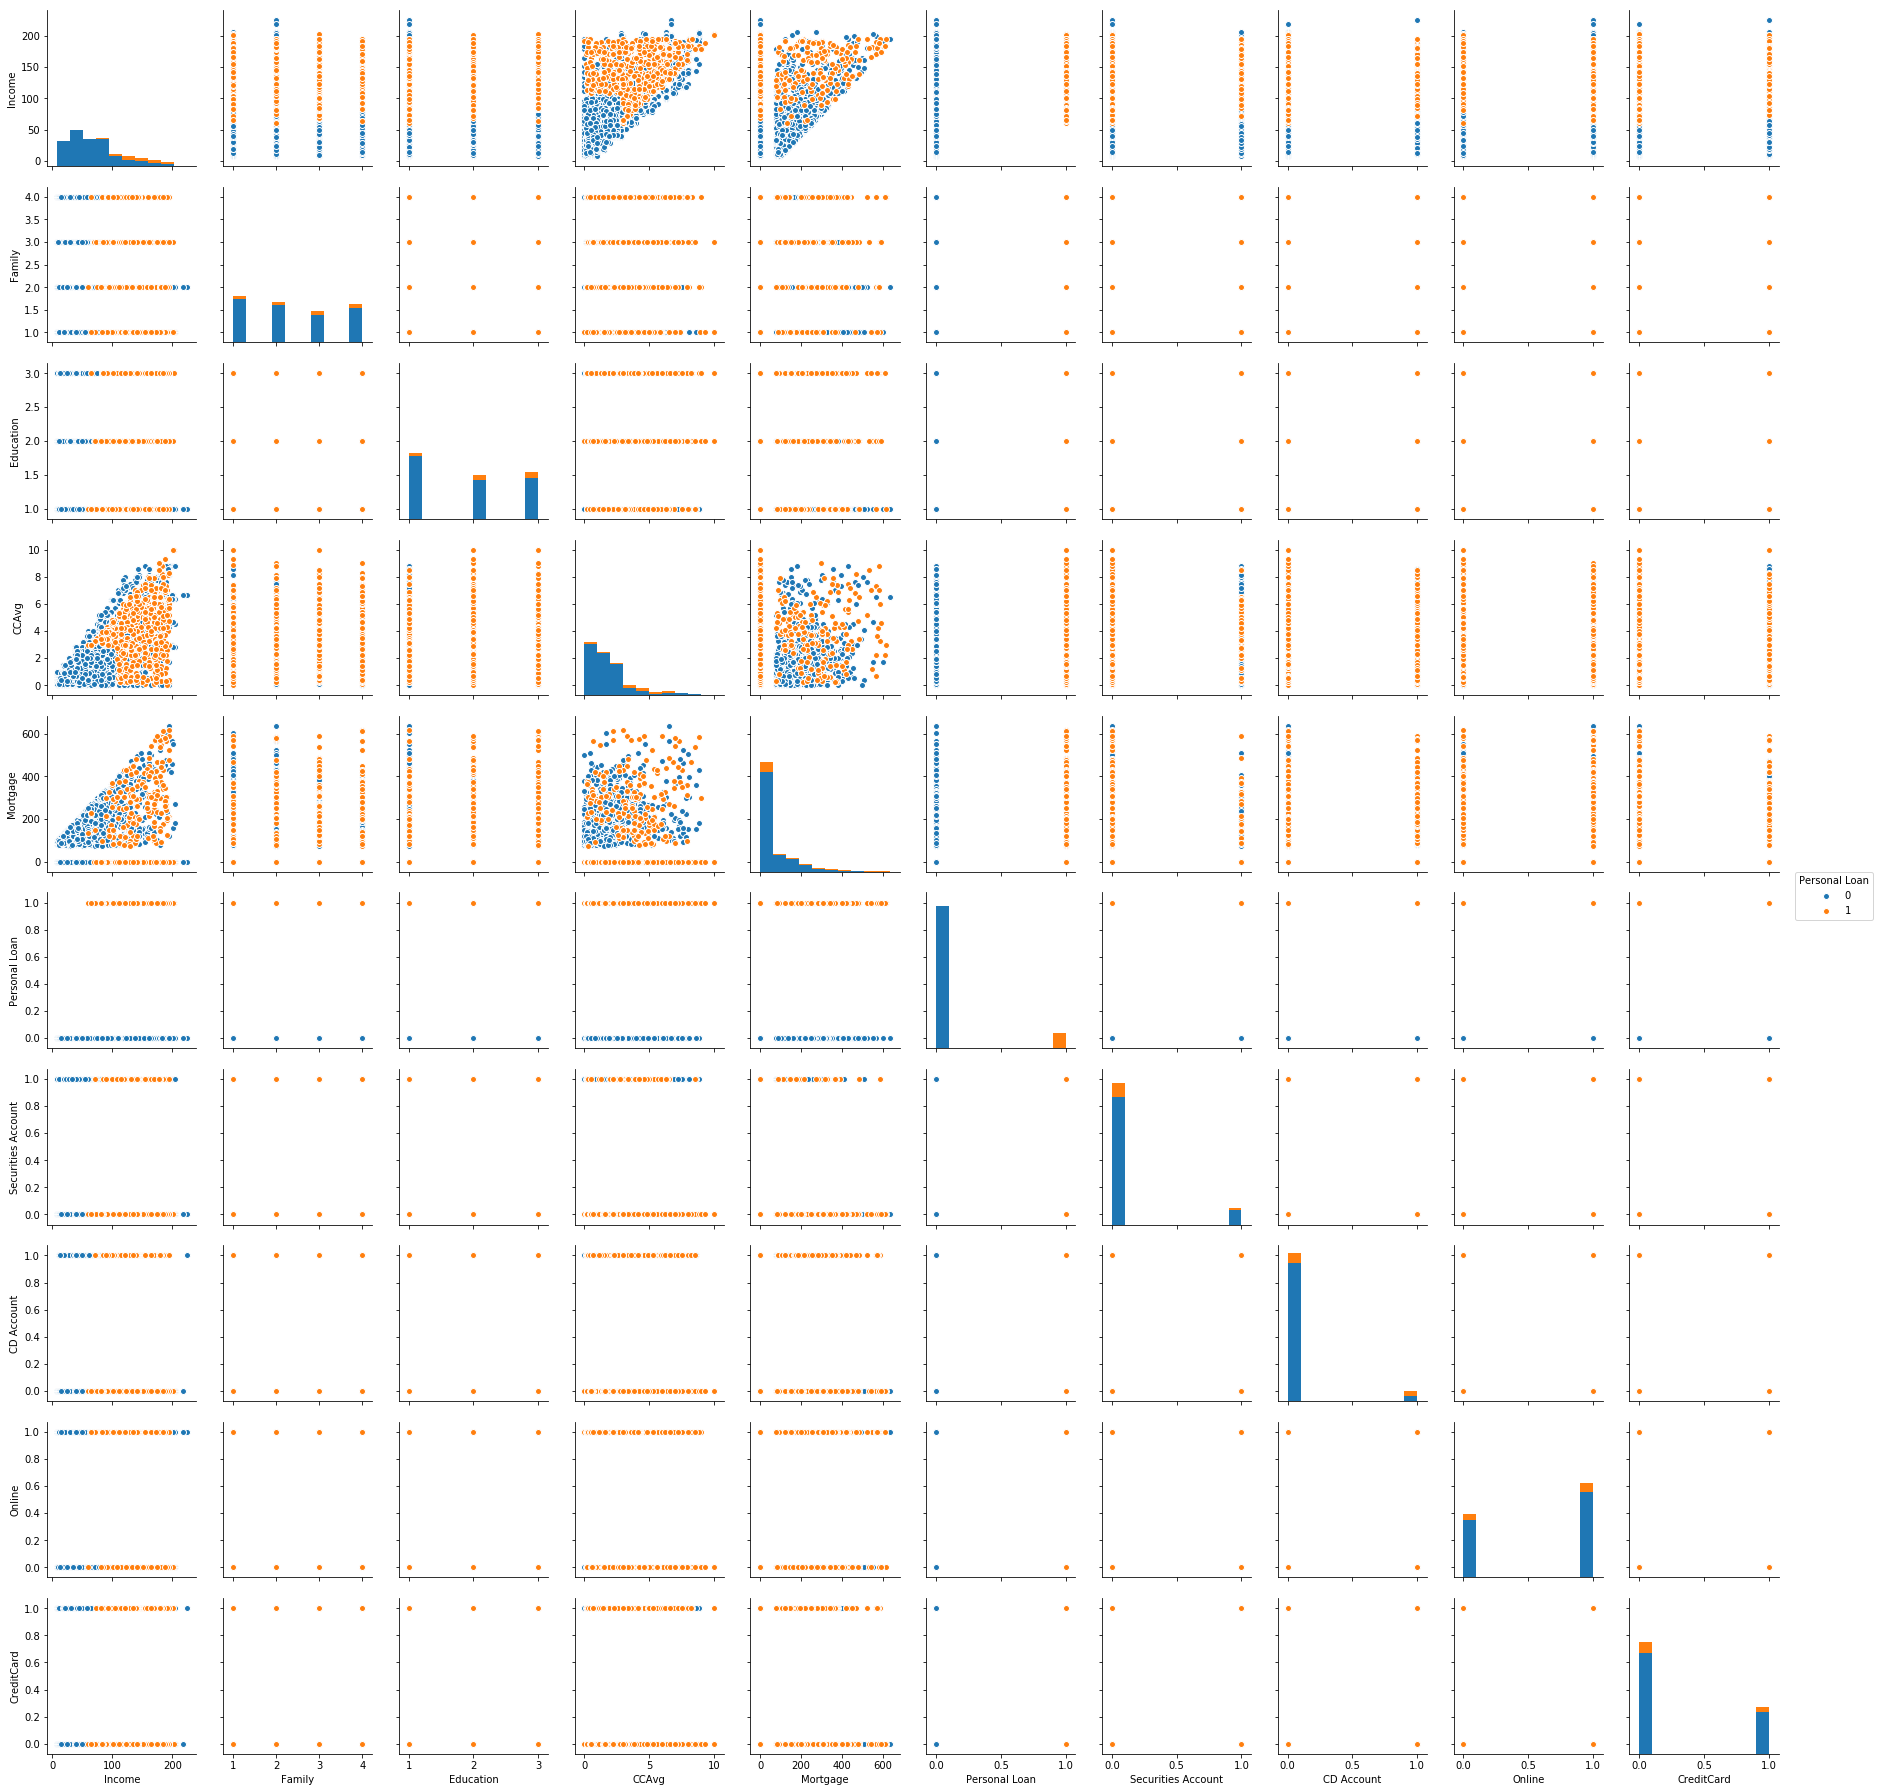

In [14]:
cols = ["Income", "Family", "Education", "CCAvg", "Mortgage", "Personal Loan", "Securities Account", "CD Account", "Online", "CreditCard"]
sns.pairplot(bankDF[cols], hue="Personal Loan")
plt.show()

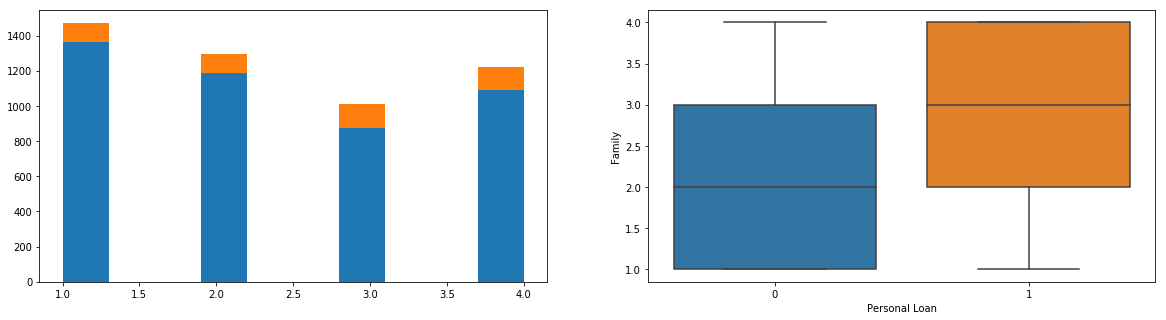

The mean persons in Family who has taken Personal Loan is 3 which closer to the 75percentile of people who have not taken loans. Models can use this to do some inference


In [15]:
#check for any significance for Family
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
histData = [bankDF["Family"][bankDF["Personal Loan"]==cls_name] for cls_name in [0, 1]]
ax1.hist(histData, histtype='bar', stacked=True)
sns.boxplot(x="Personal Loan", y="Family", data=bankDF, ax=ax2)
plt.show()
print("The mean persons in Family who has taken Personal Loan is 3 which closer to the 75percentile of people who have not taken loans. Models can use this to do some inference")

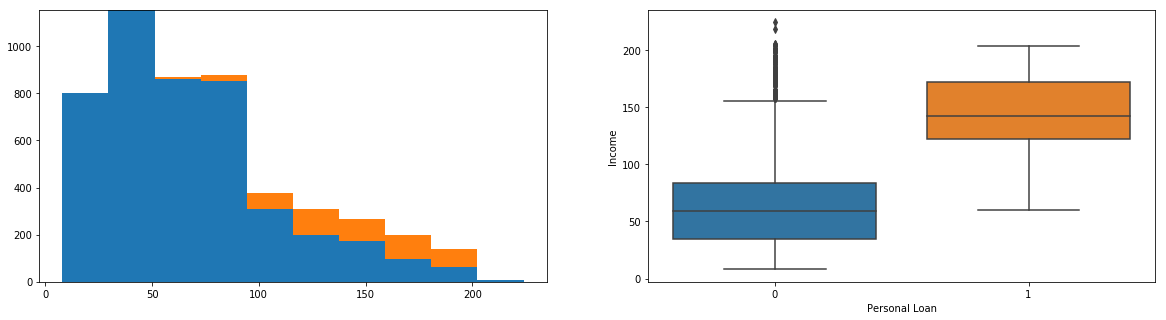

Feature offers possible seperation. Model can use this feature for inference


In [16]:
#check for any significance for Income
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
histData = [bankDF["Income"][bankDF["Personal Loan"]==cls_name] for cls_name in [0, 1]]
ax1.hist(histData, histtype='bar', stacked=True)
sns.boxplot(x="Personal Loan", y="Income", data=bankDF, ax=ax2)
plt.show()
print("Feature offers possible seperation. Model can use this feature for inference")

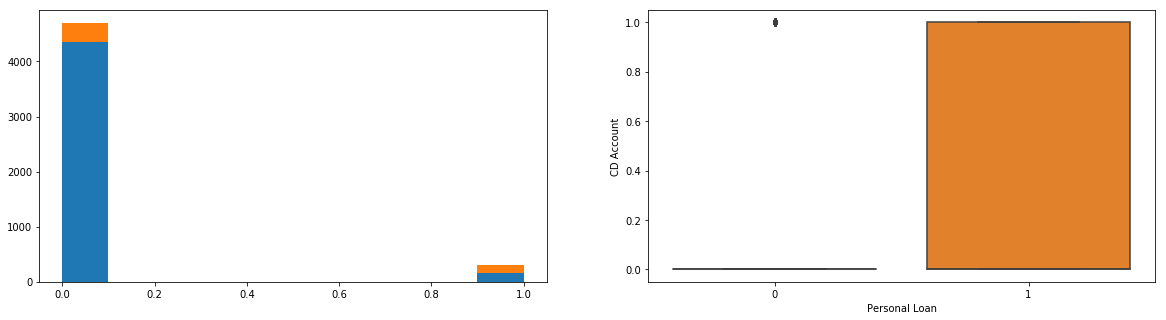

There are more chances of going for a loan if person has Certificate deposit account


In [17]:
#check for any significance for Income
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
histData = [bankDF["CD Account"][bankDF["Personal Loan"]==cls_name] for cls_name in [0, 1]]
ax1.hist(histData, histtype='bar', stacked=True)
sns.boxplot(x="Personal Loan", y="CD Account", data=bankDF, ax=ax2)
plt.show()
print("There are more chances of going for a loan if person has Certificate deposit account")

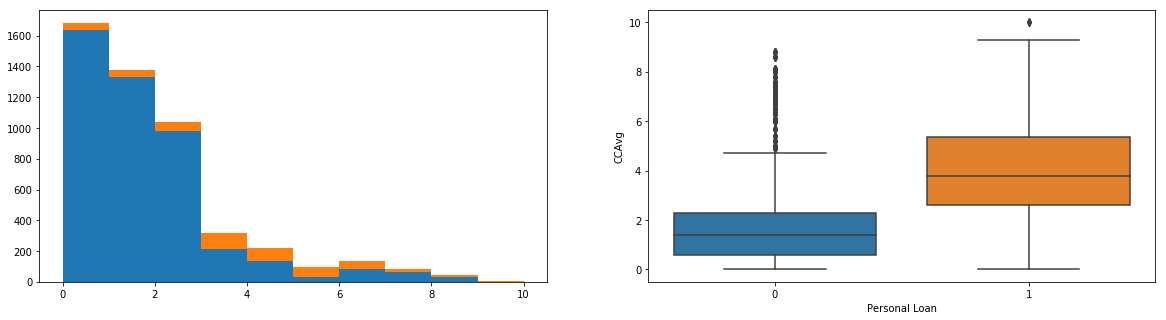

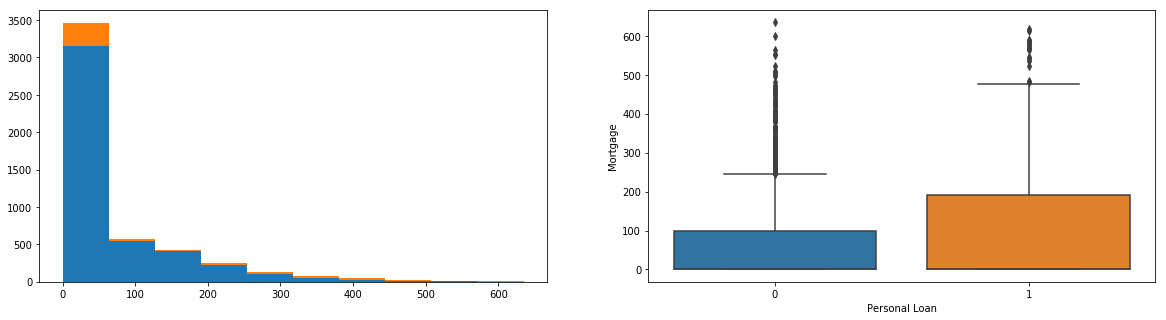

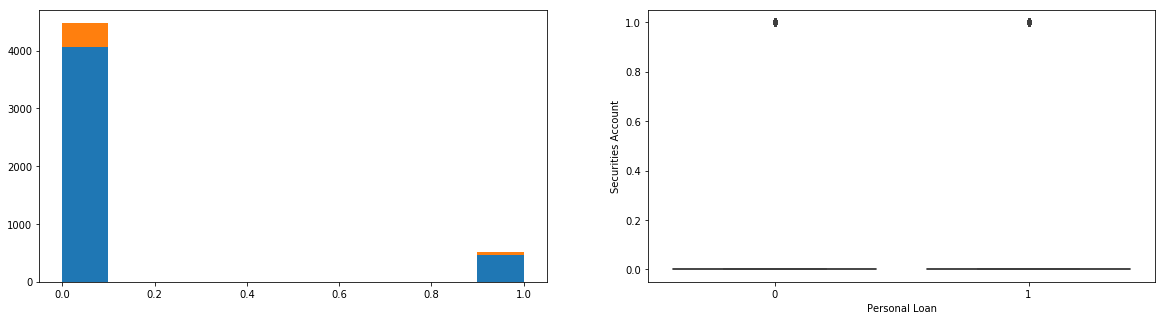

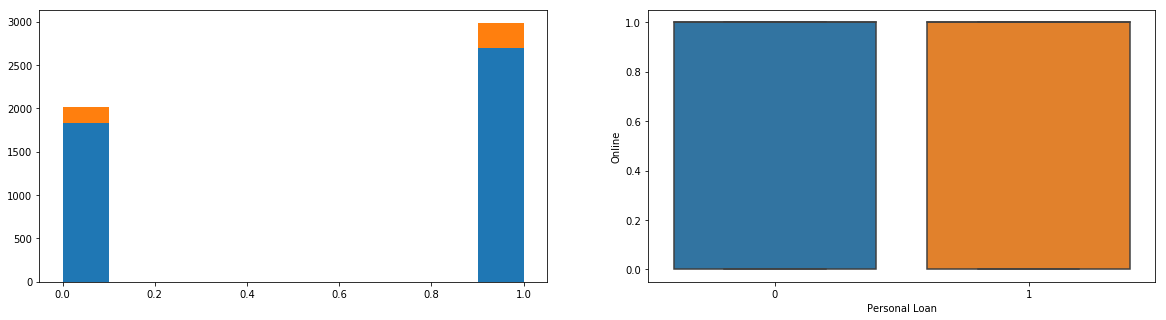

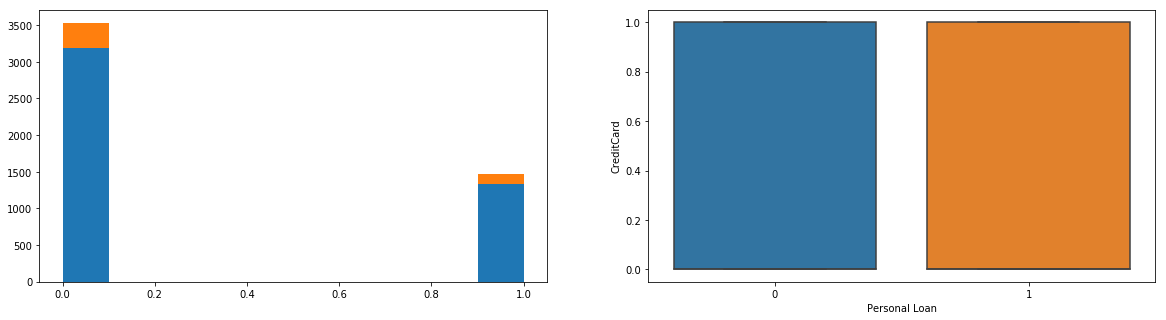

In [18]:
#check for other columns
cols = ["CCAvg", "Mortgage", "Personal Loan", "Securities Account", "Online", "CreditCard"]
for col in cols:
    if(col != "Personal Loan"):
        
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
        histData = [bankDF[col][bankDF["Personal Loan"]==cls_name] for cls_name in [0, 1]]
        ax1.hist(histData, histtype='bar', stacked=True)
        sns.boxplot(x="Personal Loan", y=col, data=bankDF, ax=ax2)
        plt.show()

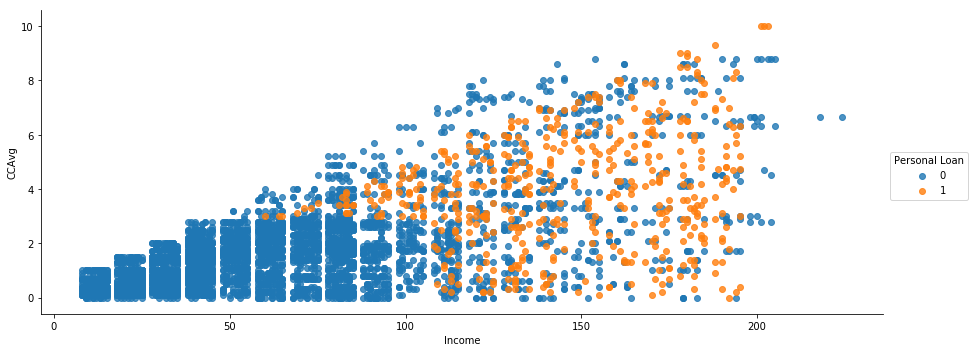

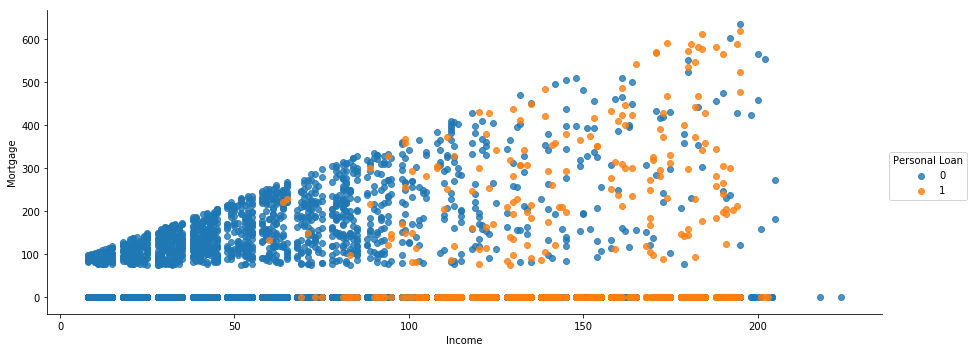

In [19]:
#Looking at some pair plots in detail
sns.lmplot('Income', 'CCAvg', data=bankDF, hue="Personal Loan", fit_reg=False, aspect=2.5)
plt.show()
sns.lmplot('Income', 'Mortgage', data=bankDF, hue="Personal Loan", fit_reg=False, aspect=2.5)
plt.show()

In [20]:
#based on above analysis drop the non significant columns which dont really act as a feature for prediction
colsToDrop = ["ZIP Code", "Age", "Experience", "Securities Account", "Online", "CreditCard"]
bankDF.drop(colsToDrop,axis=1, inplace=True)
bankDF.sample(3)

Income  Family  CCAvg  Education  Mortgage  Personal Loan  CD Account
4470     111       2    5.3          2         0              1           0
1555      49       4    1.7          2       104              0           0
3384     162       1    8.6          1       153              0           0

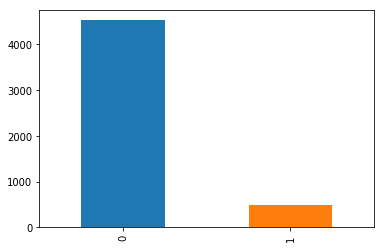

0    4520
1     480
Name: Personal Loan, dtype: int64
% clients with personal loan 9.6


In [21]:
#Question 2:
#Get the target column distribution.
#Your comments
pd.value_counts(bankDF["Personal Loan"]).plot(kind="bar")
plt.show()
loanData = pd.value_counts(bankDF["Personal Loan"])
print(pd.value_counts(bankDF["Personal Loan"]))
print("% clients with personal loan", 100.0*loanData[1]/sum(loanData))

In [22]:
target = "Personal Loan"
#Preparing Y - Feature to be learnt and then identified
Y = bankDF[target]
#Preparing X - All required columns except the identified Y & number which has no significance
X = bankDF.drop([target],axis=1)

In [23]:
#Question 3:
#Split the data into training and test set in the ratio of 70:30 respectively
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,random_state=5)
print("Training data size:", Y_train.count())
print("Testing  data size:", Y_test.count())

Training data size: 3500
Testing  data size: 1500


In [24]:
#just as good practice use Standard Scaler to scale the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
#False Positive: (Type 1 Error) Interpretation: You predicted positive and it’s false. 
#You predicted that the person will take loan but he actually will not.
#False Negative: (Type 2 Error) Interpretation: You predicted negative and it’s false.
#You predicted that the person will not take loan but he actually will.
#Create a function for printing confusion matrix and Accuracy
def printConfusionMatrixAndAccuracy(PrintText, ConfusionMatrix):
    print("Confusion matrix - ", PrintText)
    print(ConfusionMatrix)
    print("Analysis of confusion matrix")
    print("True positive: correctly predicted as will not take loan - ", ConfusionMatrix[0,0])
    print("True negative: correctly predicted as will take loan - ", ConfusionMatrix[1,1])
    print("False positive: wrongly predicted as will take loan - ", ConfusionMatrix[0,1])
    print("False negative: wrongly predicted as will not take loan - ", ConfusionMatrix[1,0])

def printConfusionMatrixTable(ConfusionMatrix1, ConfusionMatrix2, ConfusionMatrix3, ConfusionMatrix4):
    print("\n1 - ", ConfusionMatrix1, "\n2 - ", ConfusionMatrix2, "\n3 - ", ConfusionMatrix3, "\n4 - ", ConfusionMatrix4)

def recallScore(ConfusionMatrix):
    #TP/[TP+FN]
    return ConfusionMatrix[0,0]/(ConfusionMatrix[0,0]+ConfusionMatrix[1,0])

def precisionScore(ConfusionMatrix):
    #TP/[TP+FP]
    return ConfusionMatrix[0,0]/(ConfusionMatrix[0,0]+ConfusionMatrix[0,1])

def f1Score(ConfusionMatrix):
    #2*Recall*Precision/[Recall+Precision]
    return (2*recallScore(ConfusionMatrix)*precisionScore(ConfusionMatrix))/[recallScore(ConfusionMatrix)+precisionScore(ConfusionMatrix)]

def printRecallTable(ConfusionMatrix1, ConfusionMatrix2, ConfusionMatrix3, ConfusionMatrix4):
    print(recallScore(ConfusionMatrix1), recallScore(ConfusionMatrix2), recallScore(ConfusionMatrix3), recallScore(ConfusionMatrix4))

def printPrecisionTable(ConfusionMatrix1, ConfusionMatrix2, ConfusionMatrix3, ConfusionMatrix4):
    print(precisionScore(ConfusionMatrix1), precisionScore(ConfusionMatrix2), precisionScore(ConfusionMatrix3), precisionScore(ConfusionMatrix4))

    
def printF1ScoreTable(ConfusionMatrix1, ConfusionMatrix2, ConfusionMatrix3, ConfusionMatrix4):
    print(f1Score(ConfusionMatrix1), f1Score(ConfusionMatrix2), f1Score(ConfusionMatrix3), f1Score(ConfusionMatrix4))

In [26]:
#Question 4:
#Use different classification models (Logistic, K-NN and Naïve Bayes) 
#to predict the likelihood of a liability customer buying personal loans (15 points)
#Using Logistic Regression
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,Y_train)
print("Training Accuracy", logreg.score(X_train, Y_train))

Training Accuracy 0.9474285714285714


In [27]:
# predit the Y using Logit
Y_pred_train = logreg.predict(X_train)
#Training set metrics
printConfusionMatrixAndAccuracy("Logistic Regression Training", metrics.confusion_matrix(Y_train, Y_pred_train))

Confusion matrix -  Logistic Regression Training
[[3121   48]
 [ 136  195]]
Analysis of confusion matrix
True positive: correctly predicted as will not take loan -  3121
True negative: correctly predicted as will take loan -  195
False positive: wrongly predicted as will take loan -  48
False negative: wrongly predicted as will not take loan -  136


In [28]:
#Question 5:
#Print the confusion matrix for all the above models (5 points)
# predit the Y using Logit
Y_pred = logreg.predict(X_test)
#Testing set metrics
confusion_matrix_logreg = metrics.confusion_matrix(Y_test, Y_pred)
printConfusionMatrixAndAccuracy("Logistic Regression Testing", confusion_matrix_logreg)

Confusion matrix -  Logistic Regression Testing
[[1327   24]
 [  61   88]]
Analysis of confusion matrix
True positive: correctly predicted as will not take loan -  1327
True negative: correctly predicted as will take loan -  88
False positive: wrongly predicted as will take loan -  24
False negative: wrongly predicted as will not take loan -  61


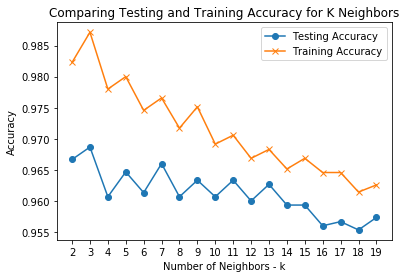

K value of 3 is the best case. Choosing the same for processing...


In [29]:
#Question 4:
#Use different classification models (Logistic, K-NN and Naïve Bayes) 
#to predict the likelihood of a liability customer buying personal loans (15 points)
#Using KNN

#use the same data X, Y - Train and Test for the operation
kValues = np.arange(2, 20)

#declare the array for noting down the accuracy
train_accuracy_plot = np.empty(len(kValues))
test_accuracy_plot = np.empty(len(kValues))
diff_plot = np.empty(len(kValues))
i = 0

#loop through each value of k
for k in kValues:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_trainPredict = knn.predict(X_train)
    train_accuracy_plot[i] = metrics.accuracy_score(Y_train, Y_trainPredict)
    Y_testPredict = knn.predict(X_test)
    test_accuracy_plot[i] = metrics.accuracy_score(Y_test, Y_testPredict)
    diff_plot[i] = abs(train_accuracy_plot[i] - test_accuracy_plot[i])
    i = i+1
plt.title('Comparing Testing and Training Accuracy for K Neighbors')
plt.plot(kValues, test_accuracy_plot, label = 'Testing Accuracy', marker='o')
plt.plot(kValues, train_accuracy_plot, label = 'Training Accuracy', marker='x')
plt.legend()
plt.xlabel('Number of Neighbors - k')
plt.ylabel('Accuracy')
plt.xticks(kValues, kValues)
plt.show()

print("K value of 3 is the best case. Choosing the same for processing...")
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
#knn.score()

In [30]:
#Question 5:
#Print the confusion matrix for all the above models (5 points)
#Testing set metrics
confusion_matrix_knn = metrics.confusion_matrix(Y_test, Y_pred)
printConfusionMatrixAndAccuracy("KNN Testing", confusion_matrix_knn)

Confusion matrix -  KNN Testing
[[1344    7]
 [  40  109]]
Analysis of confusion matrix
True positive: correctly predicted as will not take loan -  1344
True negative: correctly predicted as will take loan -  109
False positive: wrongly predicted as will take loan -  7
False negative: wrongly predicted as will not take loan -  40


In [31]:
#Question 4:
#Use different classification models (Logistic, K-NN and Naïve Bayes) 
#to predict the likelihood of a liability customer buying personal loans (15 points)
#Using Naive Bayes
#Create a Gaussian Classifier
modelNB = GaussianNB()
# Train the model using the training sets
modelNB.fit(X_train, Y_train)
# predit the Y using Naive Bayes
Y_pred = modelNB.predict(X_test)

In [32]:
#Question 5:
#Print the confusion matrix for all the above models (5 points)
#Testing set metrics
confusion_matrix_nb = metrics.confusion_matrix(Y_test, Y_pred)
printConfusionMatrixAndAccuracy("Naive Bayes Testing", confusion_matrix_nb)

Confusion matrix -  Naive Bayes Testing
[[1237  114]
 [  68   81]]
Analysis of confusion matrix
True positive: correctly predicted as will not take loan -  1237
True negative: correctly predicted as will take loan -  81
False positive: wrongly predicted as will take loan -  114
False negative: wrongly predicted as will not take loan -  68


In [33]:
dtc = DecisionTreeClassifier(max_depth=5, criterion='entropy', random_state=0)
dtc.fit(X_train, Y_train)

# predit the Y using Decision Tree Classifier
Y_pred = dtc.predict(X_test)

In [34]:
#Question 5:
#Print the confusion matrix for all the above models (5 points)
#Testing set metrics
confusion_matrix_dt = metrics.confusion_matrix(Y_test, Y_pred)
printConfusionMatrixAndAccuracy("Decision Tree Testing", confusion_matrix_dt)

Confusion matrix -  Decision Tree Testing
[[1343    8]
 [  10  139]]
Analysis of confusion matrix
True positive: correctly predicted as will not take loan -  1343
True negative: correctly predicted as will take loan -  139
False positive: wrongly predicted as will take loan -  8
False negative: wrongly predicted as will not take loan -  10


In [35]:
#just check the feature importance to confirm if the idea developed while visualization is OK
featureImportance = dtc.feature_importances_
i = 0
for col in X.columns:
    print(col, " - ", featureImportance[i]) 
    i = i + 1

Income  -  0.5900991742232188
Family  -  0.11648306163232144
CCAvg  -  0.09795964411806321
Education  -  0.18277611208591427
Mortgage  -  0.0
CD Account  -  0.012682007940482258


In [36]:
#Question 6:
#Give your reasoning on which is the best model in this case and why it performs better? (5 points)

In [37]:
#In this case where probability of a person taking loan 
#Bank targets: Increase borrowers with increased conversion rate and reduced campaign cost
#Solution: Make depositors take personal loan and take more chances to increase the number of borrowers
    #meaning having a better Recall is good. Anyway the conversion rate would be good
    #as we would anyway ignore the True Negatives which will lead to a big improvement as 
    #compared to last year campaign led to 9% conversion rate. 
#Look for Recall as 1st and F1 score comparison as 2nd
#performing the comparison side by side for all the models
printConfusionMatrixTable(confusion_matrix_logreg, confusion_matrix_knn, confusion_matrix_nb, confusion_matrix_dt)
printRecallTable(confusion_matrix_logreg, confusion_matrix_knn, confusion_matrix_nb, confusion_matrix_dt)
printPrecisionTable(confusion_matrix_logreg, confusion_matrix_knn, confusion_matrix_nb, confusion_matrix_dt)
printF1ScoreTable(confusion_matrix_logreg, confusion_matrix_knn, confusion_matrix_nb, confusion_matrix_dt)


1 -  [[1327   24]
 [  61   88]] 
2 -  [[1344    7]
 [  40  109]] 
3 -  [[1237  114]
 [  68   81]] 
4 -  [[1343    8]
 [  10  139]]
0.9560518731988472 0.9710982658959537 0.9478927203065134 0.9926090169992609
0.9822353811991118 0.9948186528497409 0.9156180606957809 0.9940784603997039
[0.96896678] [0.98281536] [0.9314759] [0.9933432]


In [38]:
print("Both Recall and F1Score are good in KNN and Decision Trees.")
print("Since the prediction is based on customer parameters, nearby customers tend to have lot of similarities")
print("Hence KNN or Decision trees are working very well")
print("It is proposed to use both models and can use the output from both the models to decide")

Both Recall and F1Score are good in KNN and Decision Trees.
Since the prediction is based on customer parameters, nearby customers tend to have lot of similarities
Hence KNN or Decision trees are working very well
It is proposed to use both models and can use the output from both the models to decide
